## PUI2016_ExtraCredit_Project

# Analysis of Ground-level Ozone formation in Delhi, India

### Author: Avikal Somvanshi (as10724)

In [1]:
#Importing packages
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
import sys
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


# Data wrangling was done in a seperate notebook that can be found in the project folder

In [2]:
#Improting Delhi Pollution Data
df_pollution = pd.read_csv('Delhi_pollution_data_RK.csv', parse_dates=[0], infer_datetime_format=True, dayfirst=True)
df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 8 columns):
Unnamed: 0                           11856 non-null datetime64[ns]
PM2.5_Concentration(microgram/m3)    11693 non-null float64
Ozone_Concentration(microgram/m3)    11782 non-null float64
NOx_Concentration(ppb)               11855 non-null float64
Temperature(Celsius)                 11856 non-null float64
Wind_Speed(m/s)                      11856 non-null float64
Relative_Humidity(%)                 11856 non-null float64
Solar_Radiation(w/m2)                11856 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 741.1 KB


In [3]:
df_pollution.columns

Index(['Unnamed: 0', 'PM2.5_Concentration(microgram/m3)',
       'Ozone_Concentration(microgram/m3)', 'NOx_Concentration(ppb)',
       'Temperature(Celsius)', 'Wind_Speed(m/s)', 'Relative_Humidity(%)',
       'Solar_Radiation(w/m2)'],
      dtype='object')

In [4]:
#Remaning columns for the ease of recall
df_pollution.columns = [['dt', 'PM25',
       'Ozone', 'NOx',
       'Temperature', 'Wind', 'Humidity',
       'Solar_Radiation']]

In [5]:
df_pollution.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


PM25         Ozone           NOx   Temperature          Wind  \
count  11693.000000  11782.000000  11855.000000  11856.000000  11856.000000   
mean     127.671341     51.893113    168.641692     25.245209      1.214934   
std      115.125828     61.026988    211.457149      8.119243      0.879161   
min       10.170000      1.030000      6.600000      1.660000      0.300000   
25%             NaN           NaN           NaN     20.517500      0.380000   
50%             NaN           NaN           NaN     26.120000      1.030000   
75%             NaN           NaN           NaN     30.850000      1.810000   
max      985.000000    492.520000   1532.820000     44.680000      7.180000   

           Humidity  Solar_Radiation  
count  11856.000000     11856.000000  
mean      54.381272       112.831123  
std       20.365264       144.420861  
min        7.000000         1.180000  
25%       37.920000         3.250000  
50%       56.080000        11.540000  
75%       71.670000       246.190000  
max       88.130000       420.830000

In [6]:
#dropping NaNs
df_pollution.dropna(inplace=True)
df_pollution.describe()

PM25         Ozone           NOx   Temperature          Wind  \
count  11619.000000  11619.000000  11619.000000  11619.000000  11619.000000   
mean     127.777701     52.218189    170.482858     25.204179      1.210024   
std      115.336202     61.303276    212.655023      8.162447      0.878032   
min       10.170000      1.030000      6.600000      1.660000      0.300000   
25%       53.830000     15.230000     43.710000     20.310000      0.380000   
50%       90.500000     24.510000     86.640000     26.090000      1.030000   
75%      164.000000     61.775000    198.575000     30.870000      1.800000   
max      985.000000    492.520000   1532.820000     44.680000      7.180000   

           Humidity  Solar_Radiation  
count  11619.000000     11619.000000  
mean      54.102103       112.820154  
std       20.357831       144.407784  
min        7.000000         1.180000  
25%       37.670000         3.250000  
50%       55.750000        11.500000  
75%       71.410000       245.545000  
max       88.130000       420.830000

In [7]:
df_pollution.dt = pd.to_datetime(df_pollution.dt)
df_pollution.index = pd.DatetimeIndex(df_pollution.dt)

In [8]:
# 100 μg/m3 8-hour mean (http://www.who.int/mediacentre/factsheets/fs313/en/)

Number of times hourly concntration of Ozone exceeded the standard =  723
Peak pollution value recorded was  492.52 microgram/m3
Mean of the pollution was  52.2181891729 microgram/m3


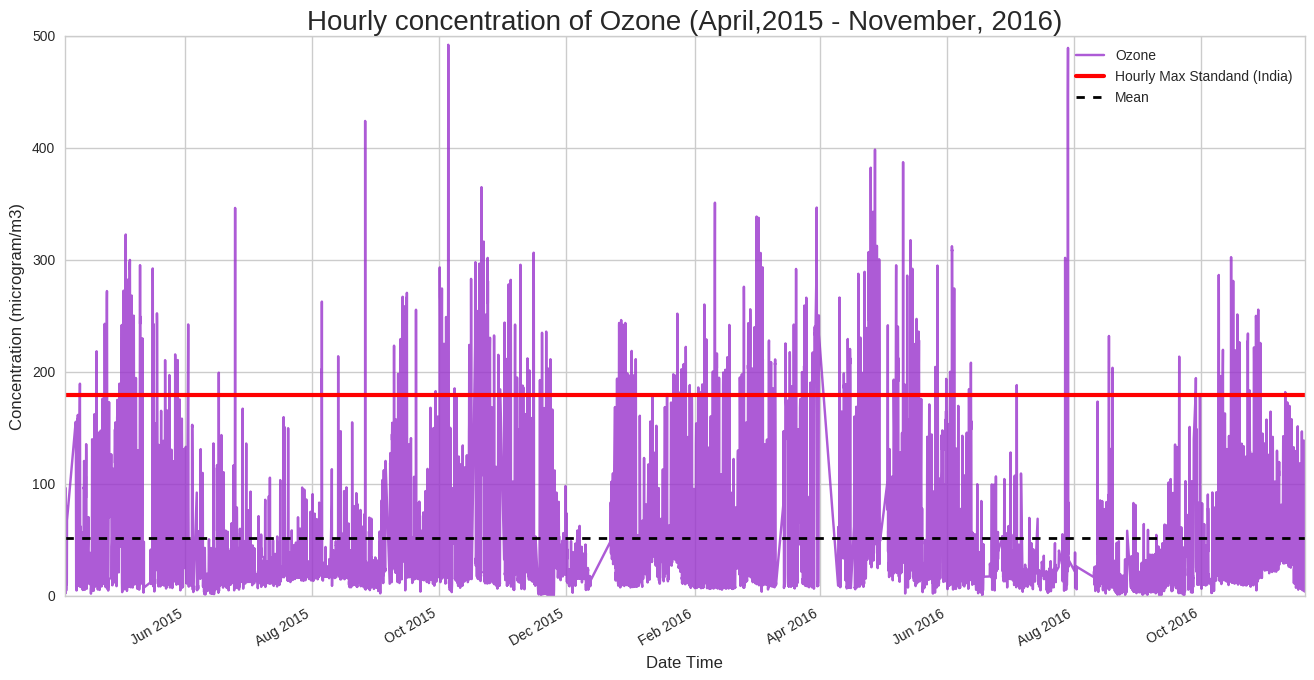

In [9]:
#Visual inspection for missing data and assessment of how many hourly the concenration levels exceeded standards
#India defines hourly maximum standard for ozone as 180 μg/m3 
# (source: http://www.arthapedia.in/index.php?title=Ambient_Air_Quality_Standards_in_India)

ozone_exceed = df_pollution.Ozone[df_pollution.Ozone > 180] 
print ('Number of times hourly concntration of Ozone exceeded the standard = ', ozone_exceed.count())

#identifying the time of the maximum peak
print ('Peak pollution value recorded was ', max(df_pollution['Ozone']), 'microgram/m3')

#printing the mean
print ('Mean of the pollution was ', np.mean(df_pollution.Ozone), 'microgram/m3')

#Ploting
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution.dt[0], df_pollution.dt[11618]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution.dt[0], df_pollution.dt[11618]], [np.mean(df_pollution.Ozone),np.mean(df_pollution.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (April,2015 - November, 2016)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend(loc=1)
pl.show()

#### Caption: Ozone pollution is highest during spring-summer (March-June) and fall (October-November). This is xpected trend as ozone formation is a function of solar radiation as during the seasons of monsoon (July-September) and winter (Decmber-Feburary) the solar access is highly reduced in Delhi due to monsoon clouds and winter fog(smog) respectively. 

### Further, the dataset has multiple instances of missing most notibly in April and May of 2015, and Janurary, April, May and September of 2016. 

# Fourier Analysis of the data

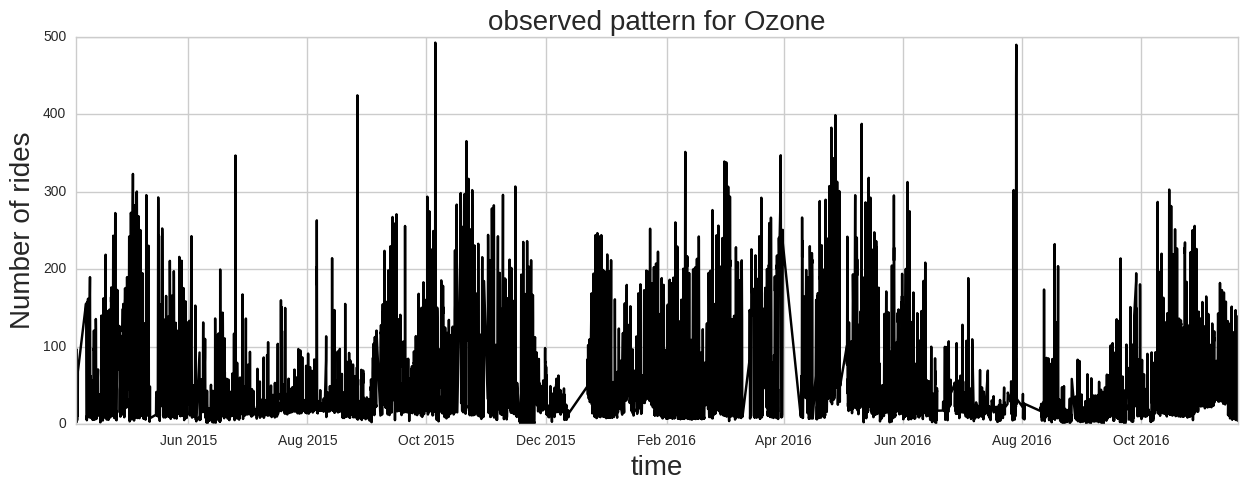

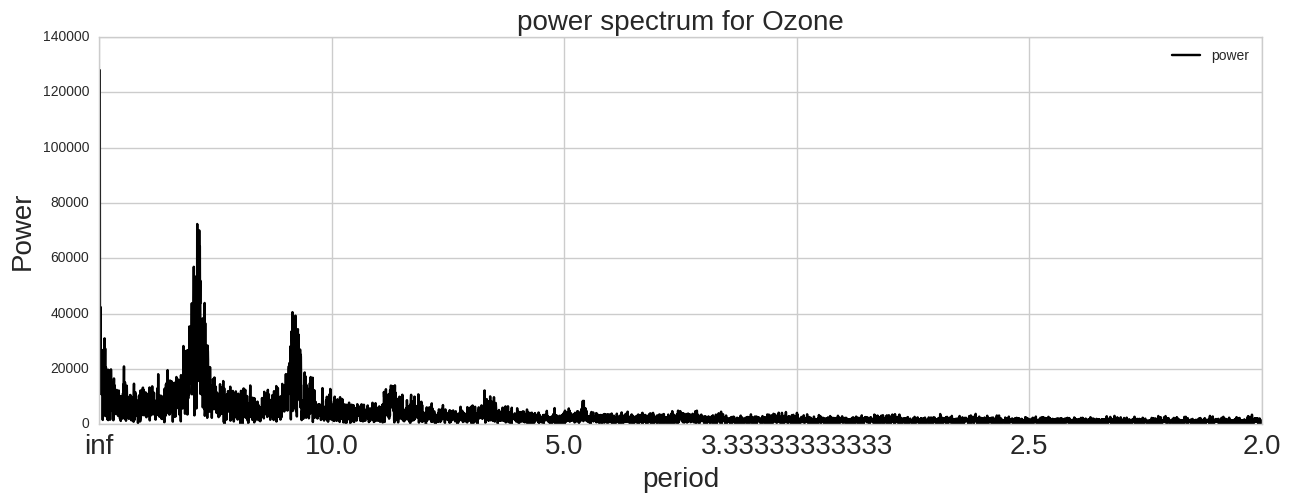

In [10]:
#plotting fourier results
ft = np.abs(np.fft.rfft(df_pollution['Ozone']))
N = len(df_pollution)
# ploting rides
fx = pl.figure(figsize=(15,5)).add_subplot(111)
fx.plot(df_pollution['Ozone'], color='black', label=' ')
fx.set_title('observed pattern for Ozone', fontsize = 20)
fx.set_ylabel("Number of rides", fontsize=20)
fx.set_xlabel("time", fontsize=20)
fx.legend(loc=4)
# ploting power spectrum from furnier transformation
ax=pl.figure(figsize=(15,5)).add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), color ='black', label = 'power')
ax.get_xticks(minor=True)
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
ax.legend(loc=1)
pl.xlabel("period", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("power spectrum for Ozone", fontsize=20)

#### Caption: Ozone has a 24 hourly periodicity, which confirms the photo-chemical nature of it formation. 

# Seasonal Analysis of the data

## Fall analysis



In [11]:
#slicing last month of the dataset
df_pollution_fall = df_pollution[-720:] 
df_pollution_fall.head()

dt    PM25   Ozone     NOx  Temperature  \
2016-10-19 15:00:00 2016-10-19 15:00:00   58.10  137.61   31.16        32.03   
2016-10-19 16:00:00 2016-10-19 16:00:00   62.00   76.72   61.88        30.53   
2016-10-19 17:00:00 2016-10-19 17:00:00  100.67   29.31  116.36        27.07   
2016-10-19 18:00:00 2016-10-19 18:00:00  104.73   31.41  342.32        23.11   
2016-10-19 19:00:00 2016-10-19 19:00:00  193.40   44.41  595.65        21.43   

                     Wind  Humidity  Solar_Radiation  
2016-10-19 15:00:00  1.42     20.58           136.00  
2016-10-19 16:00:00  1.03     23.25            42.42  
2016-10-19 17:00:00  0.45     30.00            13.00  
2016-10-19 18:00:00  0.30     43.58             3.58  
2016-10-19 19:00:00  0.30     53.58             3.58

Number of times hourly concentration of Ozone exceeded the standard =  21
Peak pollution value recorded was  256.03 microgram/m3
Mean of the pollution was  50.3985416667 microgram/m3


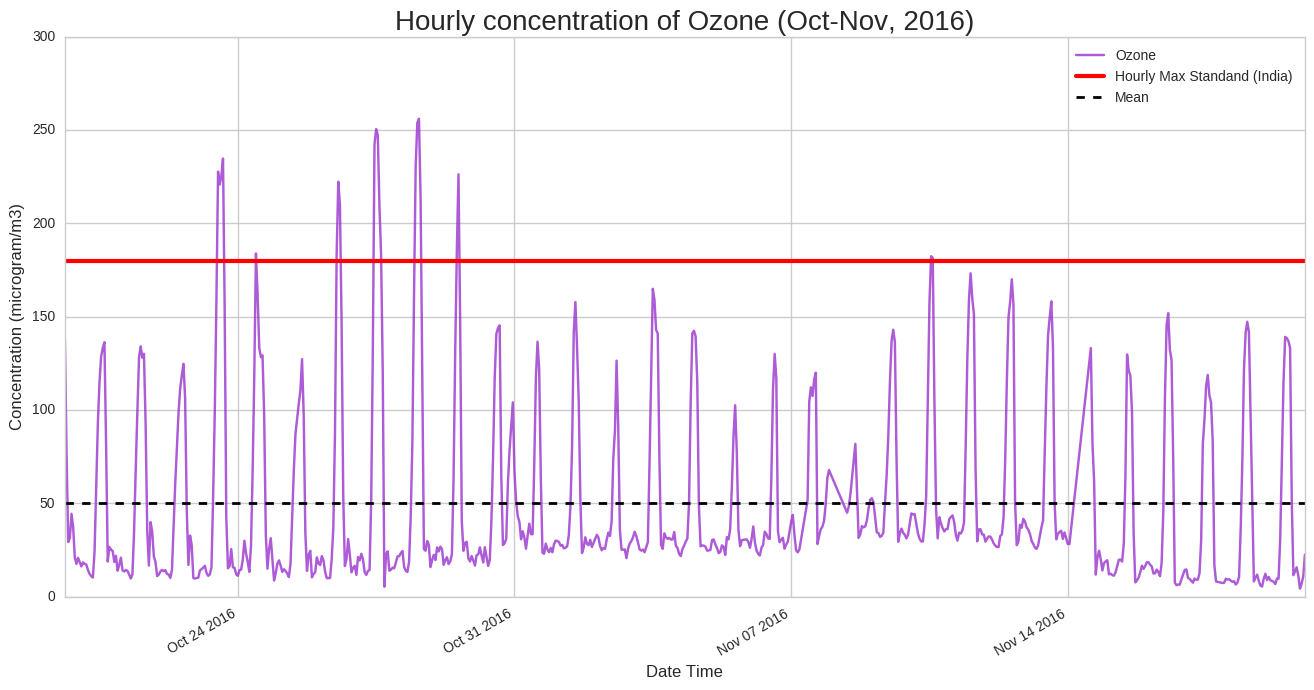

In [12]:
# Calculating instances of pollution exceeding safe standard
#India defines hourly maximum standard for ozone as 180 μg/m3 

ozone_exceed = df_pollution_fall.Ozone[df_pollution_fall.Ozone > 180] 
print ('Number of times hourly concentration of Ozone exceeded the standard = ', ozone_exceed.count())

#identifying the maximum peak
print ('Peak pollution value recorded was ', max(df_pollution_fall['Ozone']), 'microgram/m3')

#printing the mean
print ('Mean of the pollution was ', np.mean(df_pollution_fall.Ozone), 'microgram/m3')

#Visualizing the selected time stamp
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution_fall.dt[0], df_pollution_fall.dt[719]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution_fall.dt[0], df_pollution_fall.dt[719]], [np.mean(df_pollution_fall.Ozone),np.mean(df_pollution_fall.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (Oct-Nov, 2016)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation seems to have a 24 hourly periodicity. 

## Exploration of impact of individual element on Ozone concentration

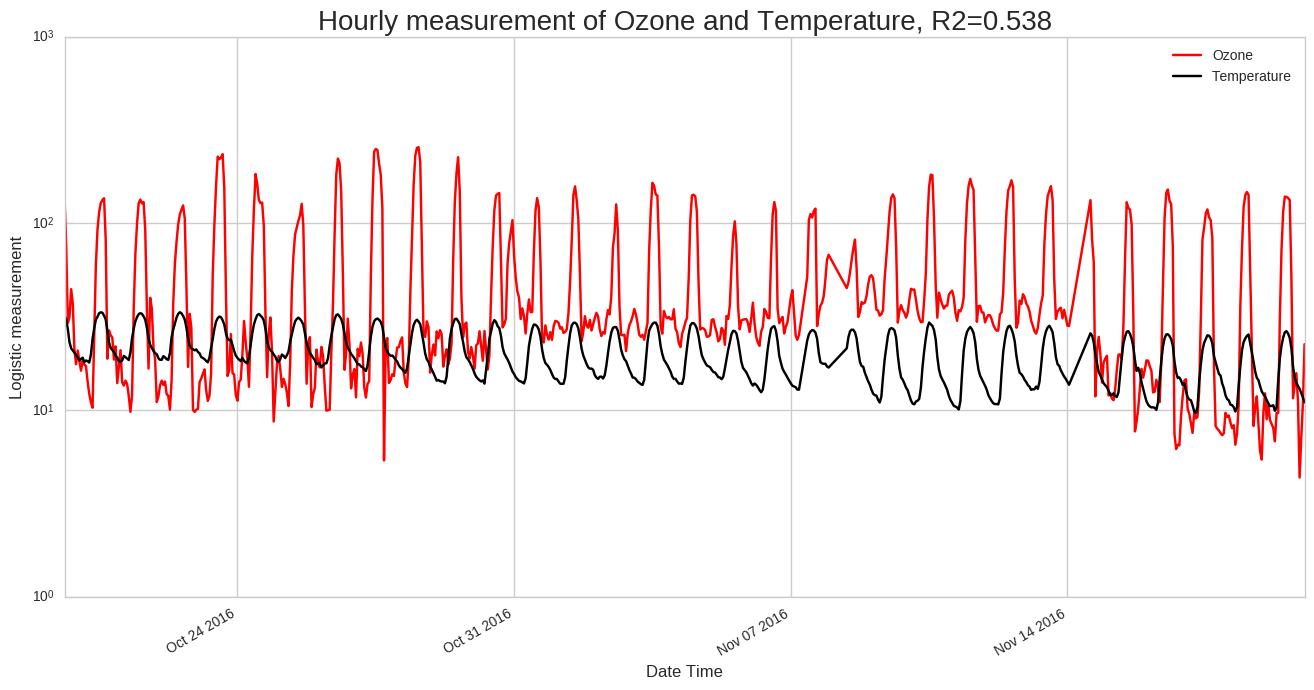

In [13]:
#Ozone vs Temperature

Regress = smf.ols(formula = 'Ozone ~ Temperature', data = df_pollution_fall).fit()

#Visualization

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='Temperature', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Temperature, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is strongly correlated to hourly temperature measurement with R2 of 0.538

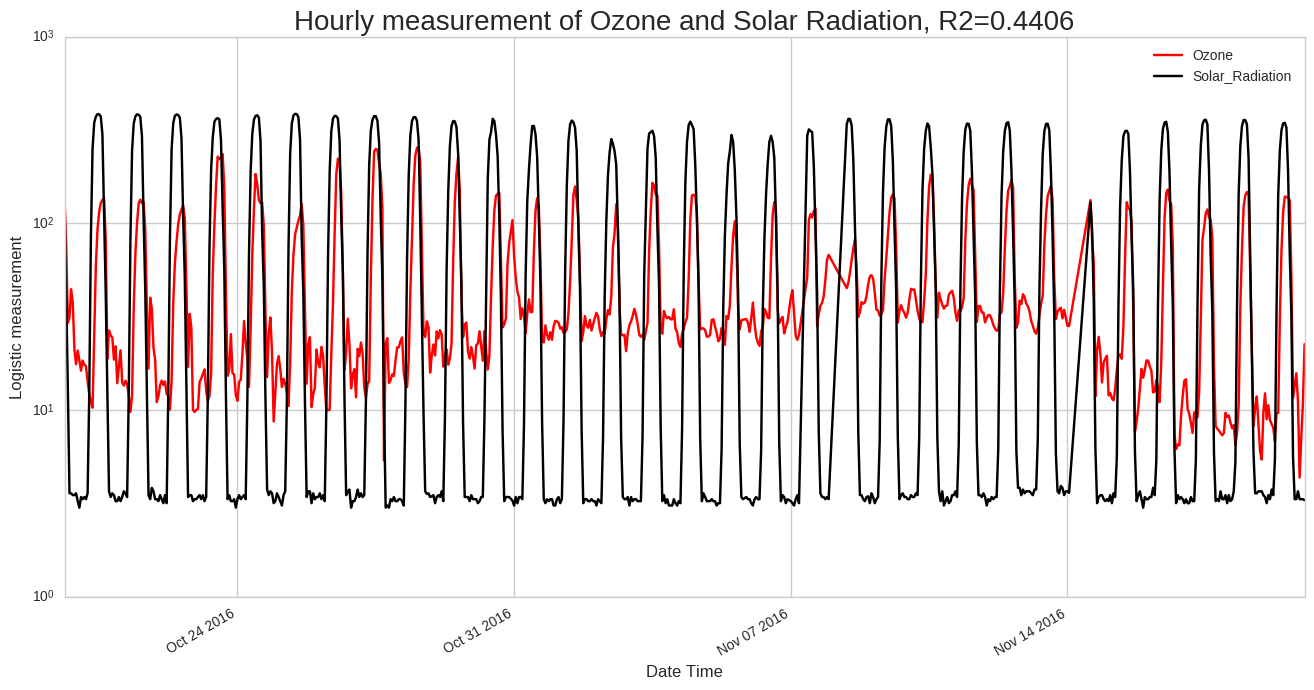

In [14]:
#Ozone vs Solar Radiation 

Regress = smf.ols(formula = 'Ozone ~ Solar_Radiation', data = df_pollution_fall).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='Solar_Radiation', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Solar Radiation, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is strongly correlated to hourly solar radiation measurement with R2 of 0.4406

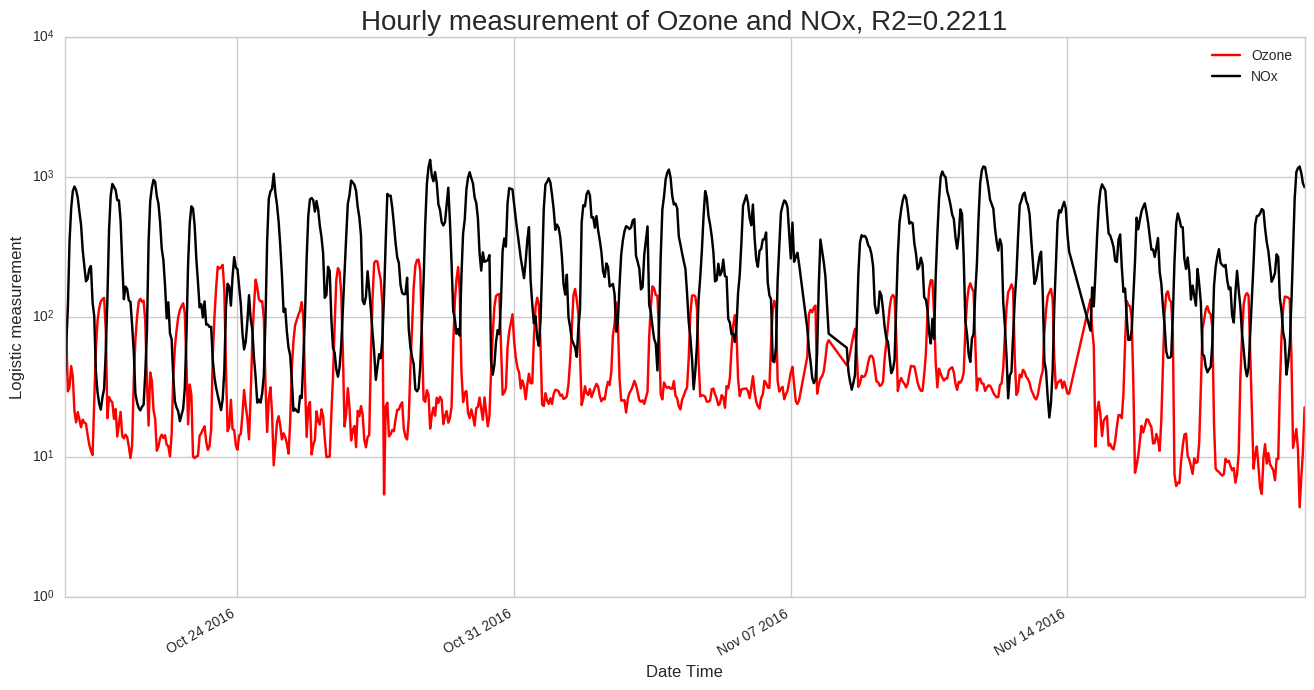

In [15]:
#Ozone vs NOx

Regress = smf.ols(formula = 'Ozone ~ NOx', data = df_pollution_fall).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='NOx', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and NOx, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation visiually seems to be negatively correlated to hourly NOx measurement but has a low R2 of 0.2211 

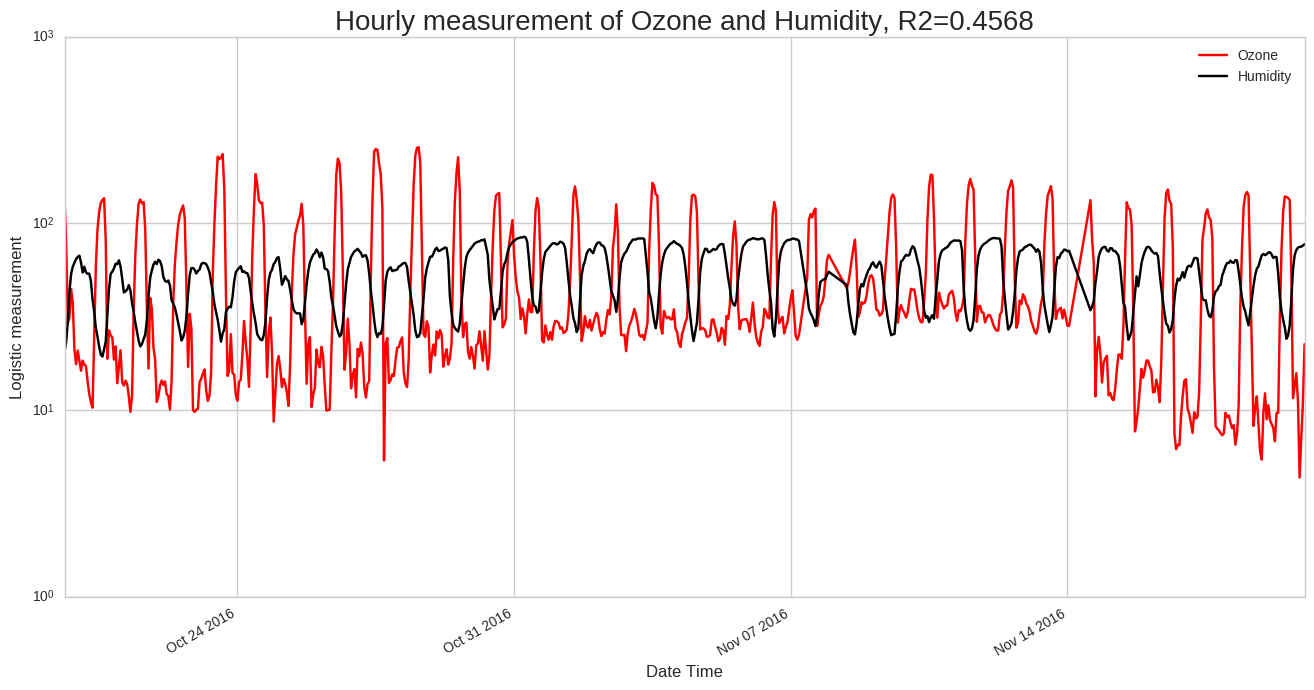

In [16]:
#Ozone vs Relative Humidity 

Regress = smf.ols(formula = 'Ozone ~ Humidity', data = df_pollution_fall).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='Humidity', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Humidity, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is strongly (negatively) correlated to hourly relative humidity measurement with R2 of 0.4568

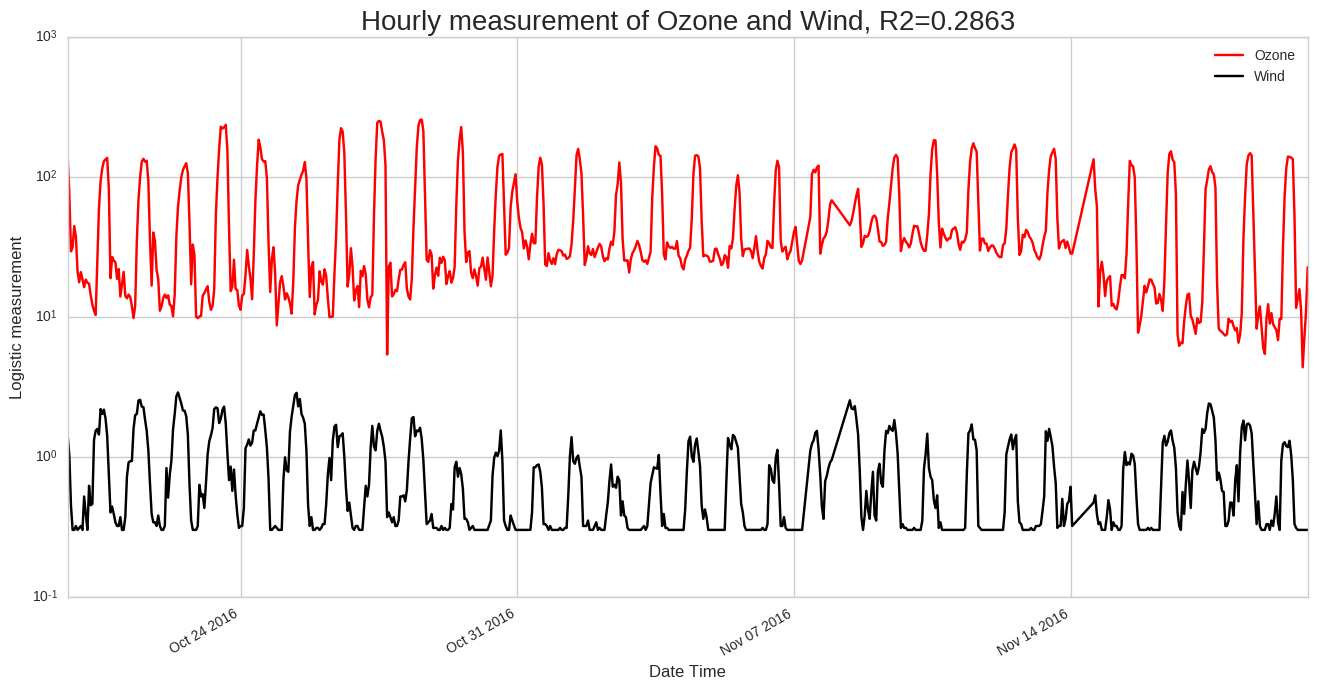

In [17]:
#Ozone vs Wind 

Regress = smf.ols(formula = 'Ozone ~ Wind', data = df_pollution_fall).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='Wind', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Wind, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation seems visually correlated to hourly temperature measurement but has poor R2 of 0.2863

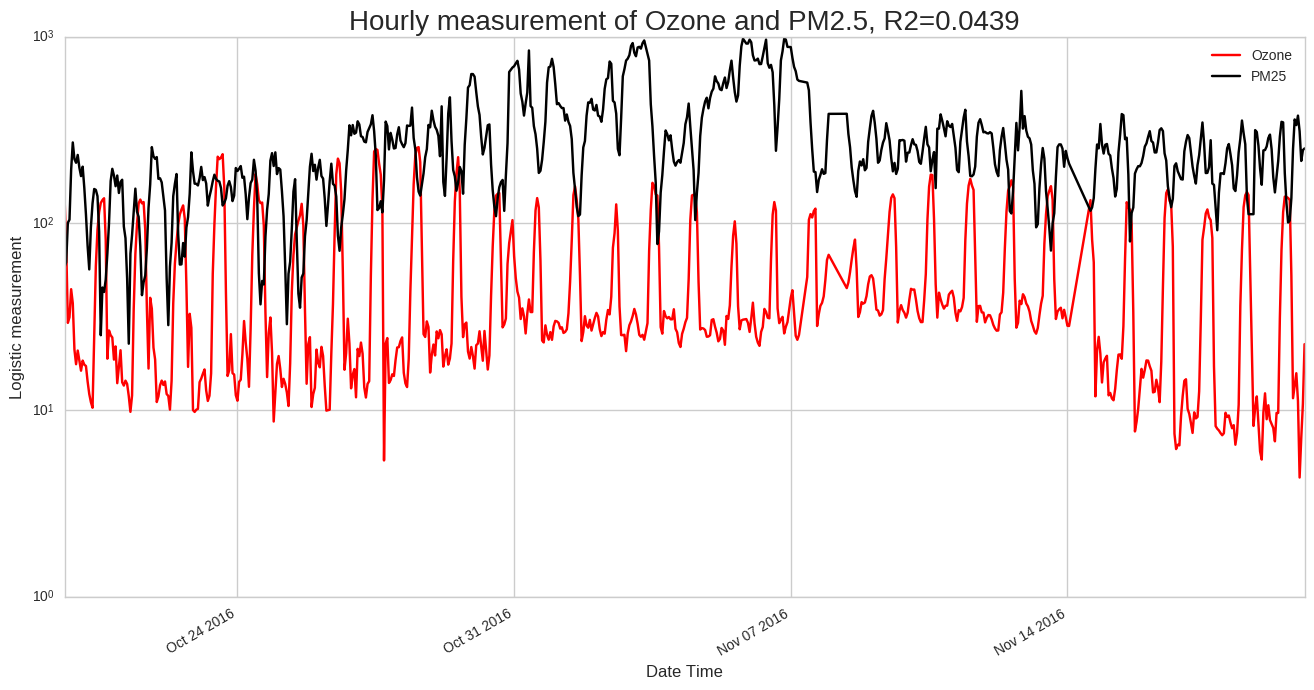

In [18]:
#Ozone vs PM2.5 

Regress = smf.ols(formula = 'Ozone ~ PM25', data = df_pollution_fall).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_fall.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_fall.plot(x='dt', y='PM25', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and PM2.5, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation has no correlated to hourly PM2.5 measurement with R2 of 0.0439

## Monsoon analysis



In [19]:
#slicing the dataset from monsoon
df_pollution.index = pd.DatetimeIndex(df_pollution.dt)
df_pollution_mon = df_pollution[(df_pollution.index.year == 2015) & (df_pollution.index.month == 8)] 
df_pollution_mon.describe()

PM25       Ozone          NOx  Temperature        Wind  \
count  704.000000  704.000000   704.000000   704.000000  704.000000   
mean    56.079787   27.273807   153.708366    28.142514    1.212216   
std     25.154884   27.836151   156.604289     3.429649    0.751775   
min     12.670000    5.600000    15.350000    20.550000    0.300000   
25%     38.827500   17.332500    56.572500    25.327500    0.560000   
50%     52.250000   19.995000   107.425000    27.425000    1.070000   
75%     68.872500   25.435000   191.097500    30.890000    1.672500   
max    168.830000  424.500000  1342.740000    36.140000    3.760000   

         Humidity  Solar_Radiation  
count  704.000000       704.000000  
mean    68.305724       119.191108  
std     12.938769       146.259557  
min     37.750000         2.250000  
25%     58.080000         3.670000  
50%     69.250000        18.710000  
75%     79.500000       264.232500  
max     88.000000       400.330000

Number of times hourly concentration of Ozone exceeded the standard =  5
Peak pollution value recorded was  424.5 microgram/m3
Mean of the pollution was  27.2738068182 microgram/m3


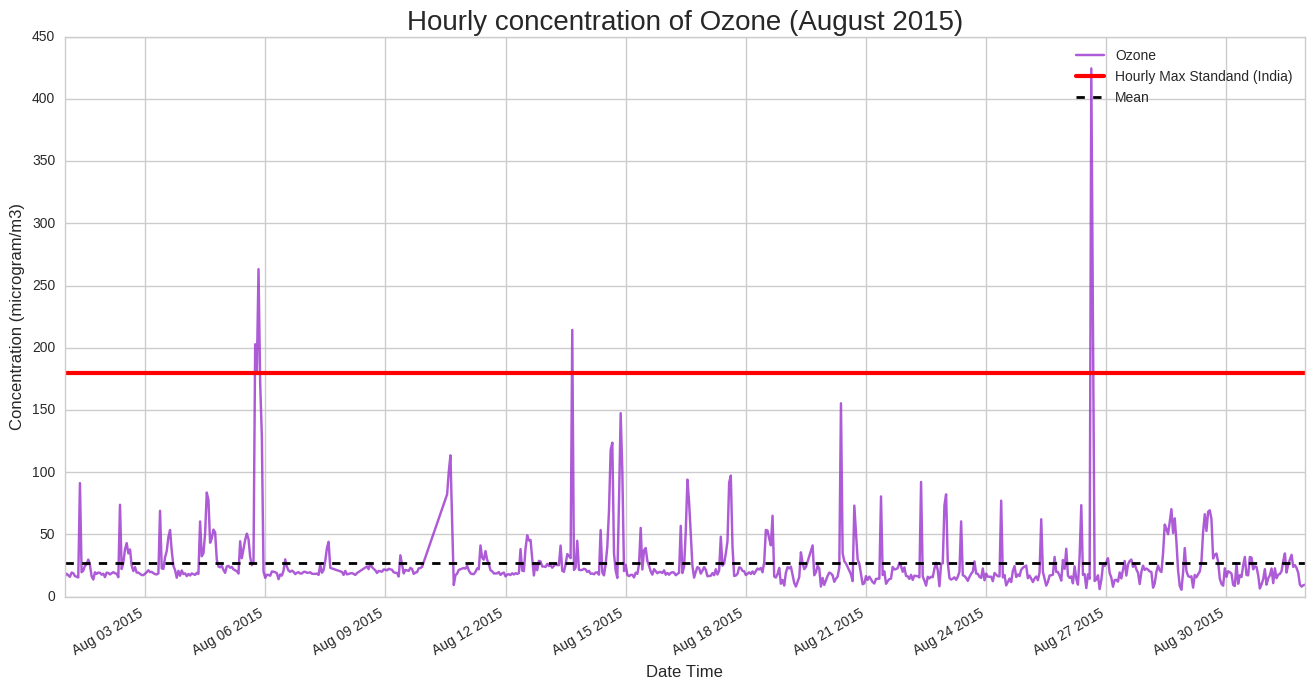

In [20]:
# Calculating instances of pollution exceeding safe standard
#India defines hourly maximum standard for ozone as 180 μg/m3 

ozone_exceed = df_pollution_mon.Ozone[df_pollution_mon.Ozone > 180] 
print ('Number of times hourly concentration of Ozone exceeded the standard = ', ozone_exceed.count())

#identifying the time of the maximum peak
print ('Peak pollution value recorded was ', max(df_pollution_mon['Ozone']), 'microgram/m3')

#printing the mean
print ('Mean of the pollution was ', np.mean(df_pollution_mon.Ozone), 'microgram/m3')

#Visualizing the selected time stamp

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution_mon.dt[0], df_pollution_mon.dt[703]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution_mon.dt[0], df_pollution_mon.dt[703]], [np.mean(df_pollution_mon.Ozone),np.mean(df_pollution_mon.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (August 2015)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation seems to have a 24 hourly periodicity. 

## Exploration of impact of individual element on Ozone concentration

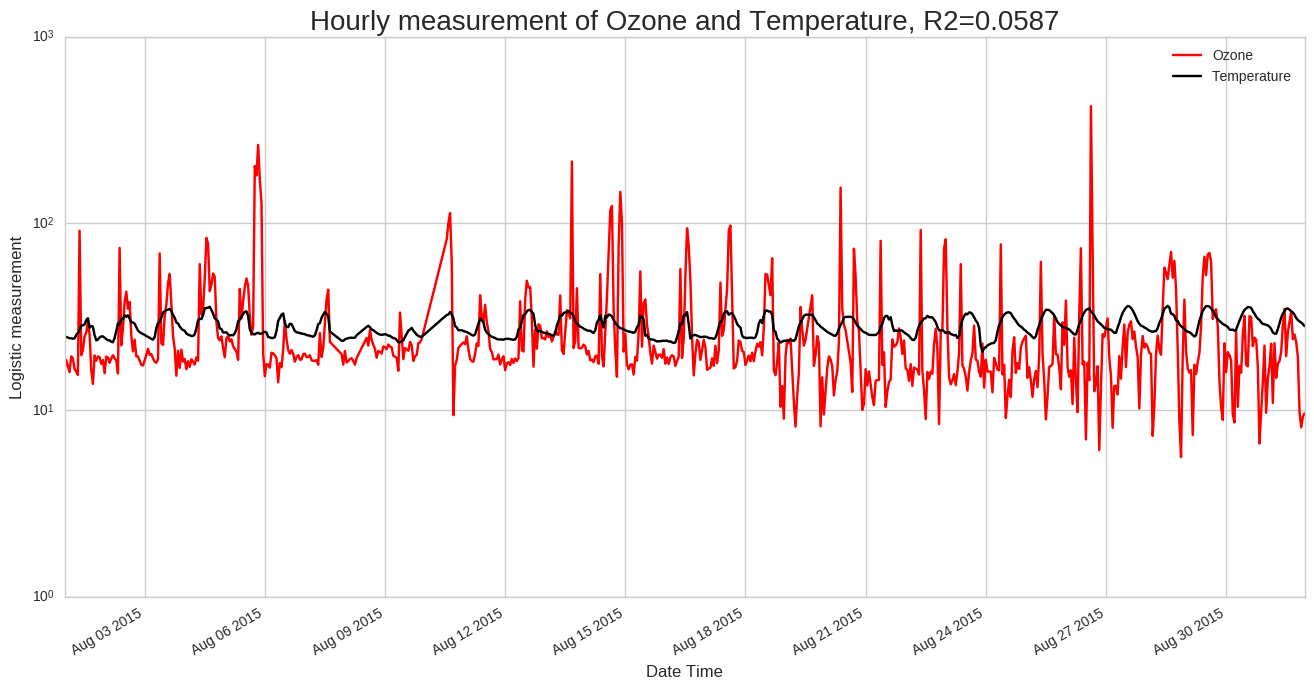

In [21]:
#Ozone vs Temperature

Regress = smf.ols(formula = 'Ozone ~ Temperature', data = df_pollution_mon).fit()

#Visualization

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='Temperature', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Temperature, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is not correlated to hourly temperature measurement with R2 of 0.0587

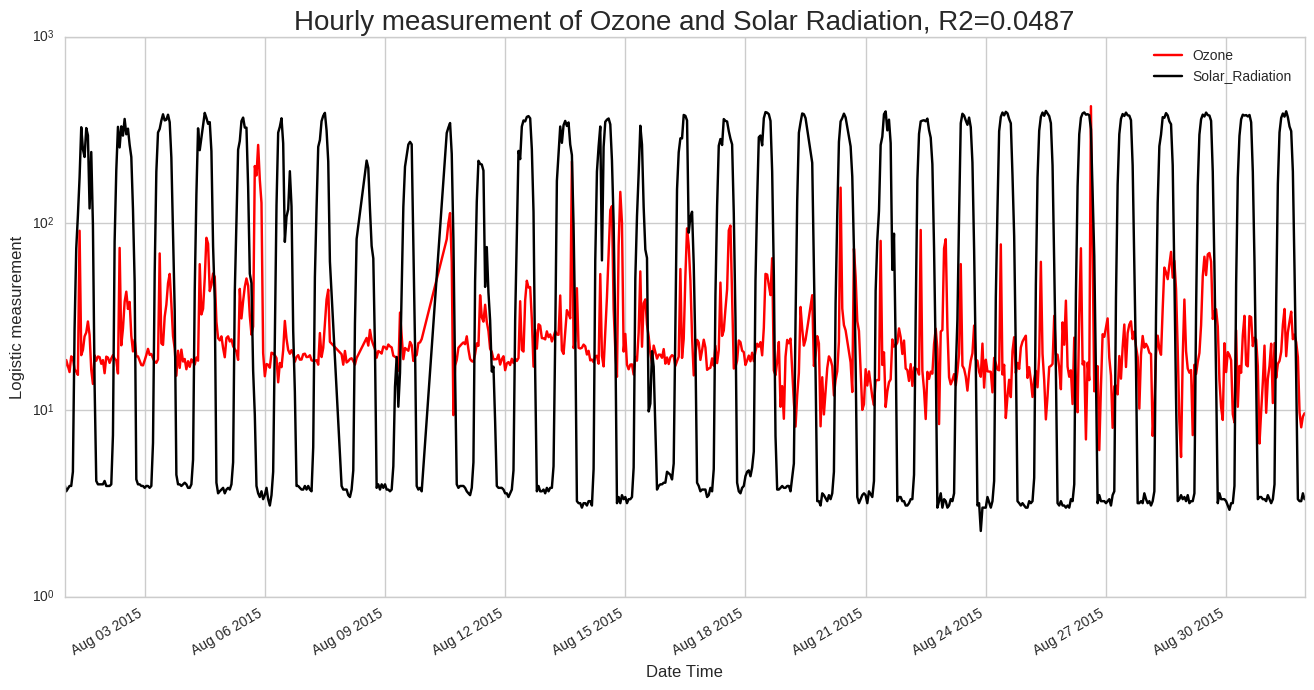

In [22]:
#Ozone vs Solar Radiation 

Regress = smf.ols(formula = 'Ozone ~ Solar_Radiation', data = df_pollution_mon).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='Solar_Radiation', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Solar Radiation, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is not correlated to hourly solar radiation measurement with R2 of 0.0487

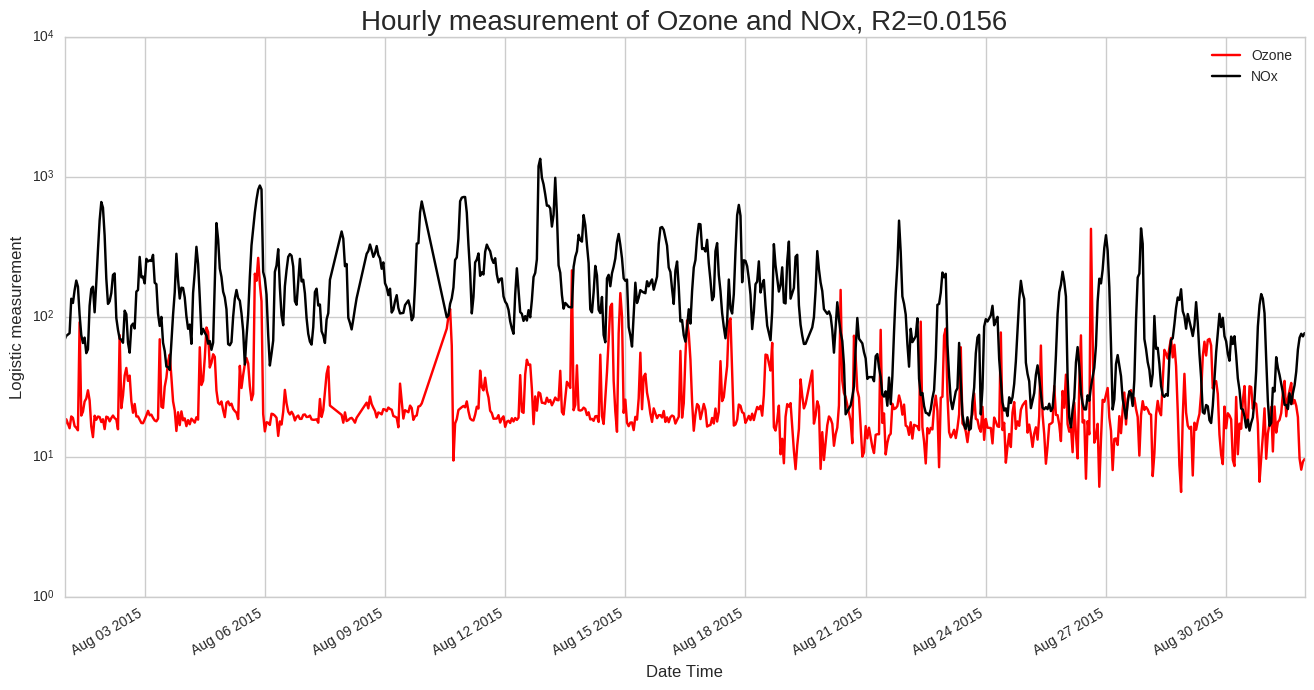

In [23]:
#Ozone vs NOx

Regress = smf.ols(formula = 'Ozone ~ NOx', data = df_pollution_mon).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='NOx', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and NOx, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is not correlated to hourly NOx measurement and has a low R2 of 0.0156 

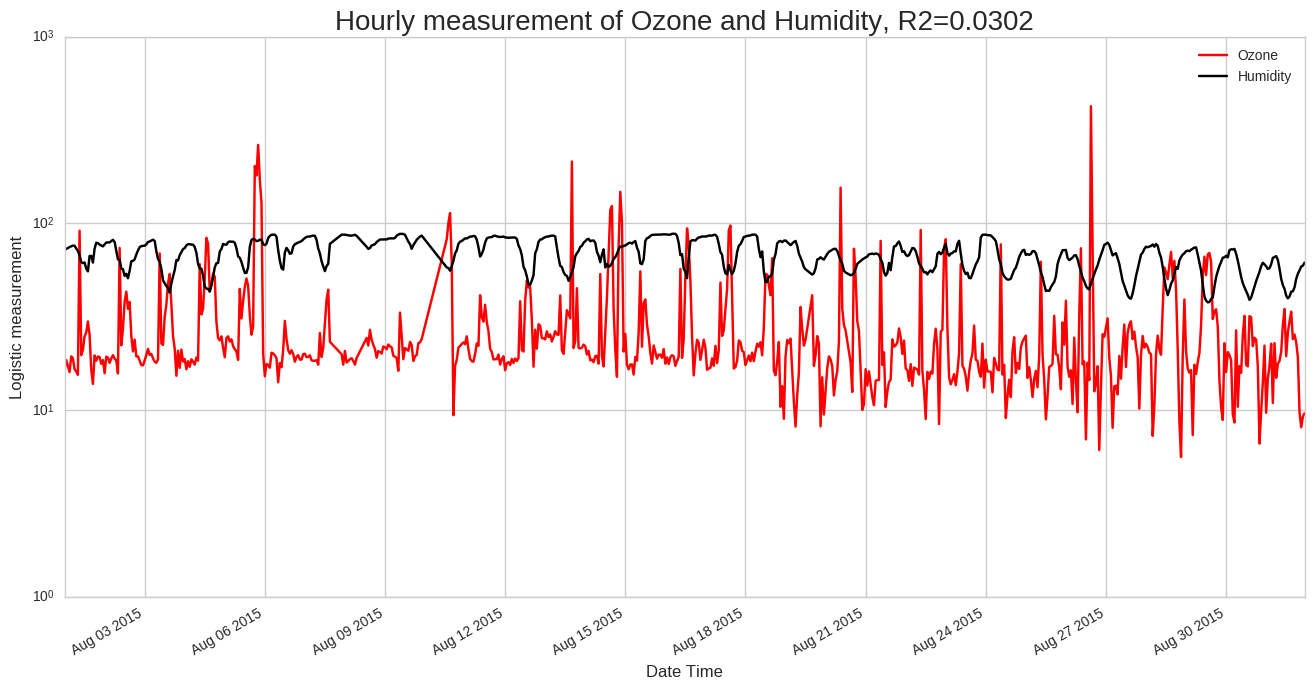

In [24]:
#Ozone vs Relative Humidity 

Regress = smf.ols(formula = 'Ozone ~ Humidity', data = df_pollution_mon).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='Humidity', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Humidity, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is visually correlated to hourly relative humidity measurement but has a very low R2 of 0.0302

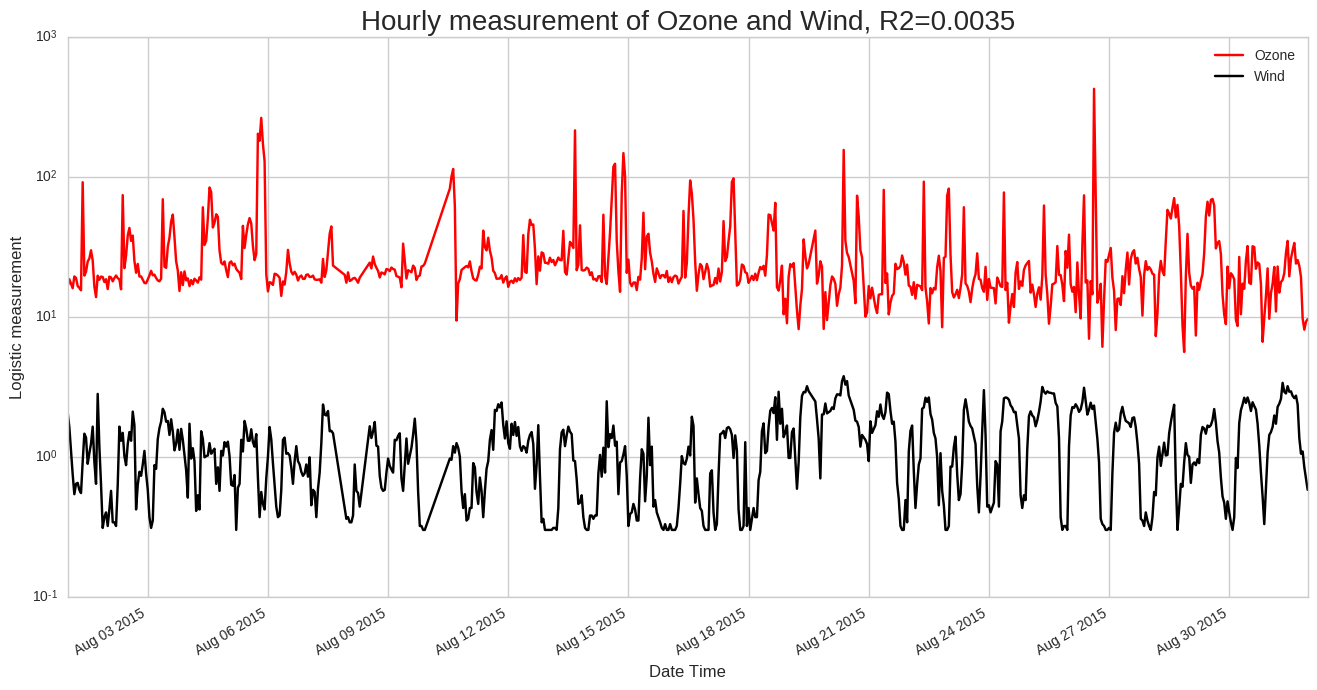

In [25]:
#Ozone vs Wind 

Regress = smf.ols(formula = 'Ozone ~ Wind', data = df_pollution_mon).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='Wind', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Wind, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is not correlated to hourly wind speed measurement and has poor R2 of 0.0035

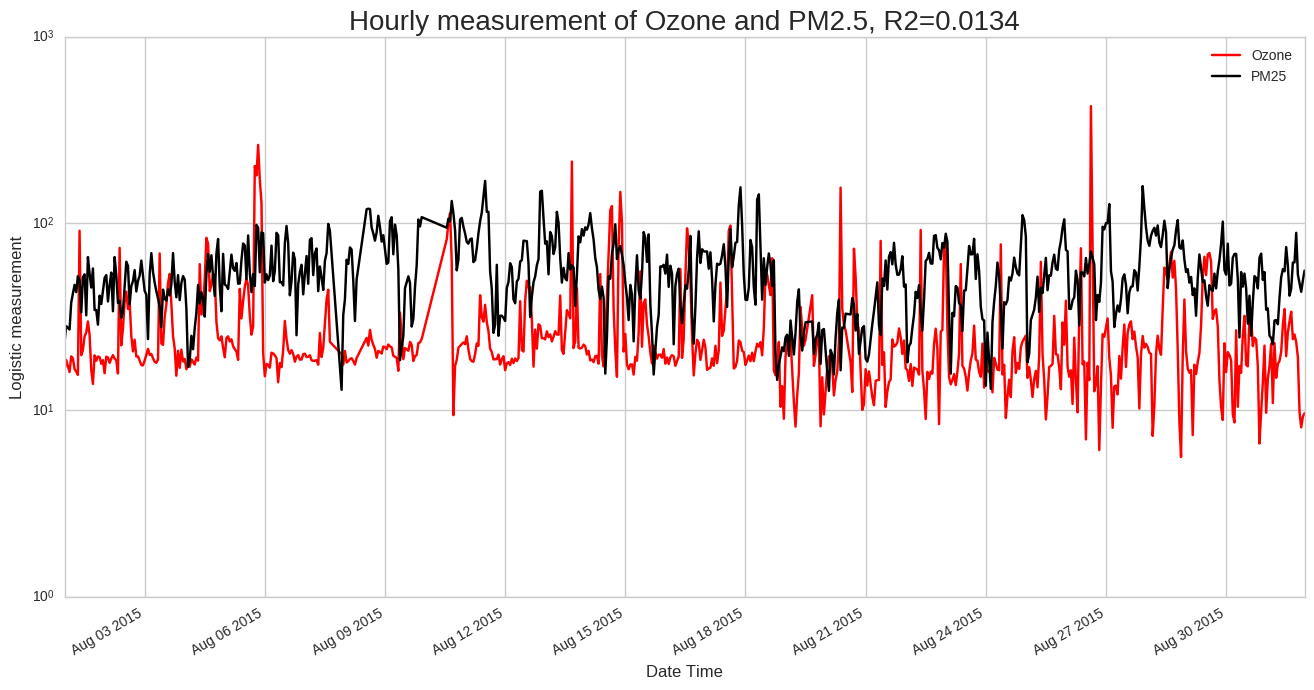

In [26]:
#Ozone vs PM2.5 

Regress = smf.ols(formula = 'Ozone ~ PM25', data = df_pollution_mon).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_mon.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_mon.plot(x='dt', y='PM25', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and PM2.5, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation has no correlated to hourly PM2.5 measurement with R2 of 0.0138

## Summer analysis



In [27]:
#slicing the dataset from summer
df_pollution.index = pd.DatetimeIndex(df_pollution.dt)
df_pollution_sum = df_pollution[(df_pollution.index.year == 2016) & (df_pollution.index.month == 5)] 
df_pollution_sum.describe()

PM25       Ozone         NOx  Temperature        Wind  \
count  640.000000  640.000000  640.000000   640.000000  640.000000   
mean   110.876938   73.187828  105.436719    31.631297    1.596594   
std     74.710559   68.738685  116.766554     5.618080    1.010033   
min     11.000000    2.510000   14.160000    19.620000    0.300000   
25%     66.000000   21.527500   37.525000    27.205000    0.695000   
50%     95.335000   44.355000   64.960000    31.170000    1.535000   
75%    133.372500  105.390000  126.360000    35.947500    2.302500   
max    652.000000  387.710000  809.730000    44.200000    5.130000   

         Humidity  Solar_Radiation  
count  640.000000       640.000000  
mean    38.338000       130.567641  
std     15.489118       153.571845  
min      8.000000         2.670000  
25%     28.377500         3.170000  
50%     36.290000        24.915000  
75%     46.710000       318.080000  
max     83.000000       407.580000

Number of times hourly concentration of Ozone exceeded the standard =  59
Peak pollution value recorded was  387.71 microgram/m3
Mean of the pollution was  73.187828125 microgram/m3


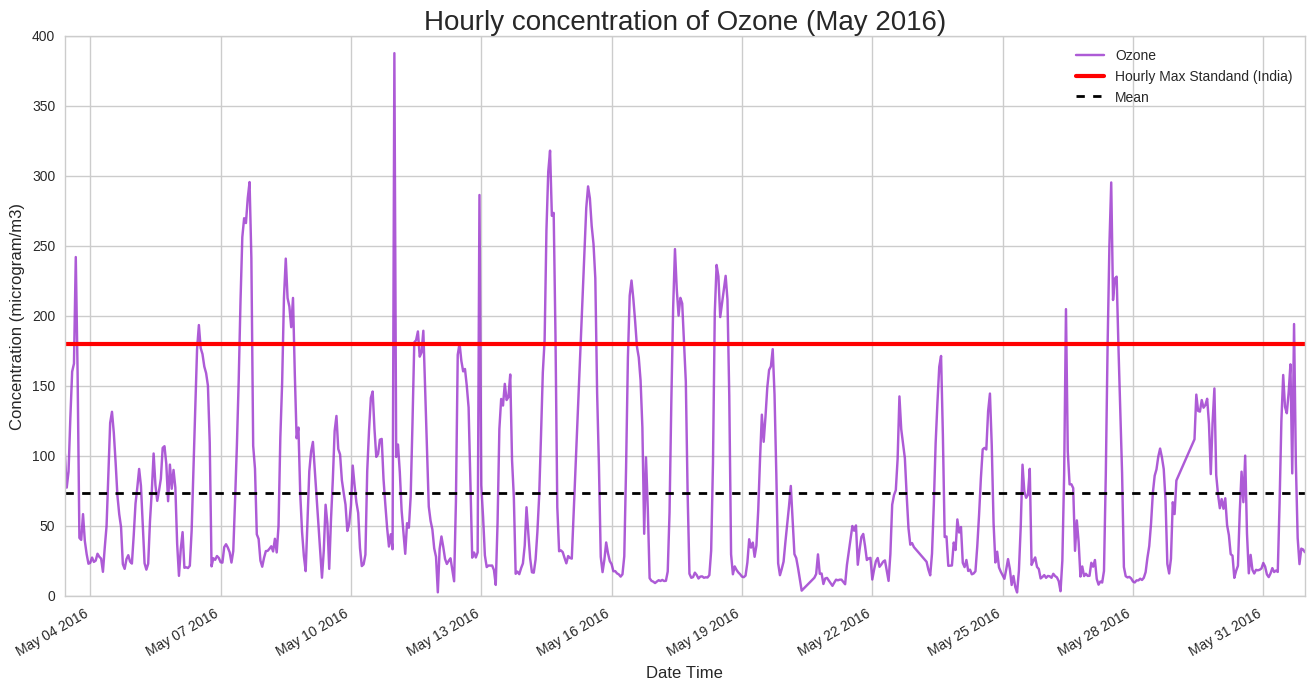

In [28]:
# Calculating instances of pollution exceeding safe standard
#India defines hourly maximum standard for ozone as 180 μg/m3 

ozone_exceed = df_pollution_sum.Ozone[df_pollution_sum.Ozone > 180] 
print ('Number of times hourly concentration of Ozone exceeded the standard = ', ozone_exceed.count())

#identifying the time of the maximum peak
print ('Peak pollution value recorded was ', max(df_pollution_sum['Ozone']), 'microgram/m3')

#printing the mean
print ('Mean of the pollution was ', np.mean(df_pollution_sum.Ozone), 'microgram/m3')

#Visualizing the selected time stamp

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='darkorchid',alpha=0.8, ax=ax)
pl.plot([df_pollution_sum.dt[0], df_pollution_sum.dt[639]], [180,180], 'r', lw=3, label='Hourly Max Standand (India)')
pl.plot([df_pollution_sum.dt[0], df_pollution_sum.dt[639]], [np.mean(df_pollution_sum.Ozone),np.mean(df_pollution_sum.Ozone)], 
        '--', color='black', lw=2, label='Mean')
pl.title('Hourly concentration of Ozone (May 2016)', fontsize=20)
pl.ylabel("Concentration (microgram/m3)", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation seems to have a 24 hourly periodicity. 

## Exploration of impact of individual element on Ozone concentration

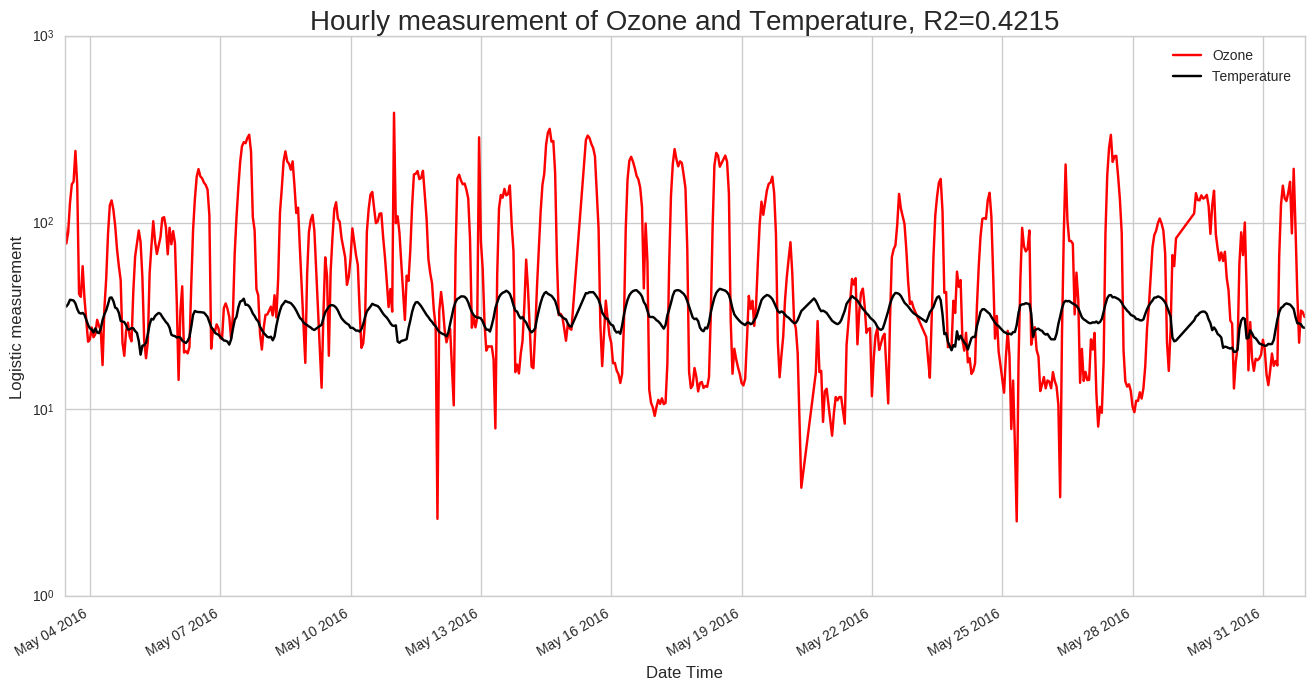

In [29]:
#Ozone vs Temperature

Regress = smf.ols(formula = 'Ozone ~ Temperature', data = df_pollution_sum).fit()

#Visualization

sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='Temperature', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Temperature, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is correlated to hourly temperature measurement with R2 of 0.4215

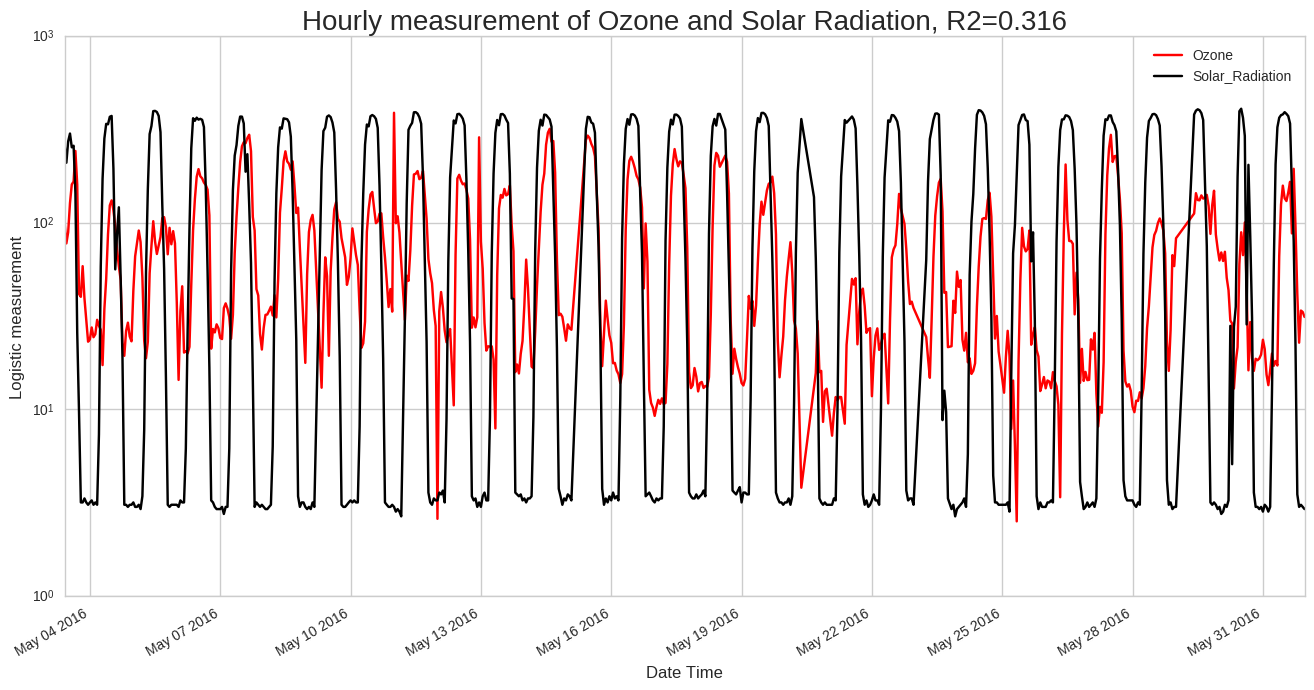

In [30]:
#Ozone vs Solar Radiation 

Regress = smf.ols(formula = 'Ozone ~ Solar_Radiation', data = df_pollution_sum).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='Solar_Radiation', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Solar Radiation, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is correlated to hourly solar radiation measurement with R2 of 0.316

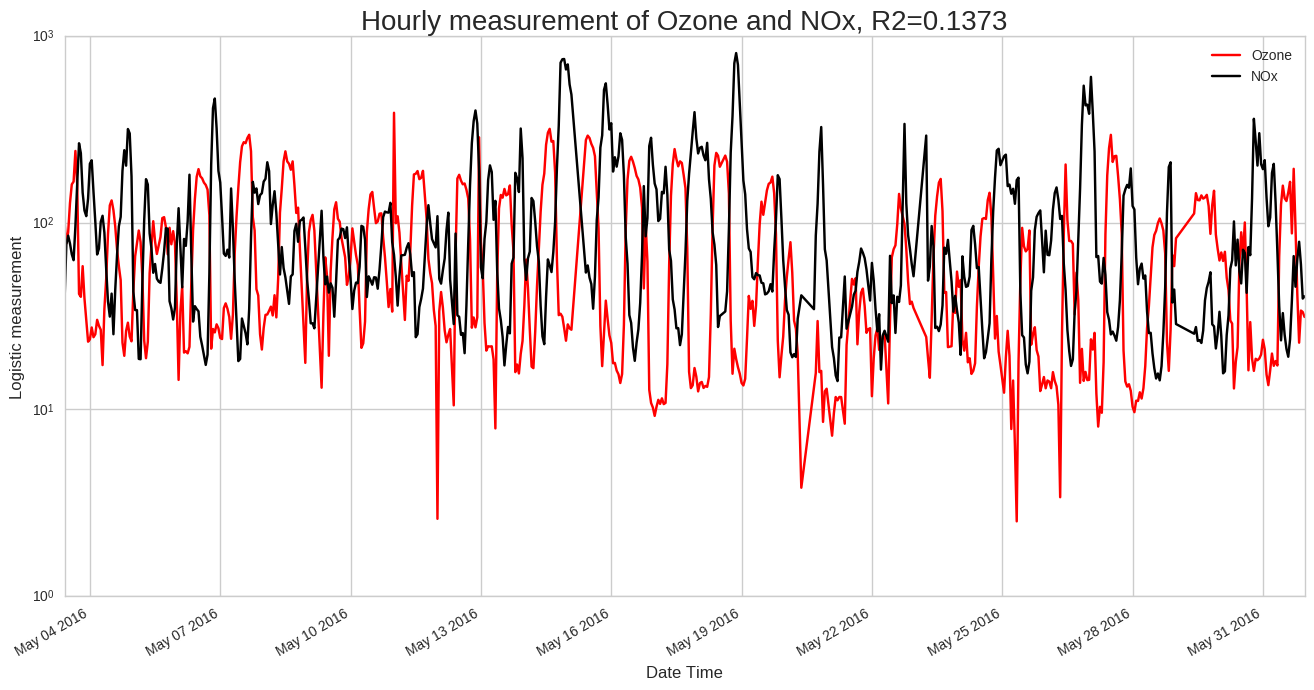

In [31]:
#Ozone vs NOx

Regress = smf.ols(formula = 'Ozone ~ NOx', data = df_pollution_sum).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='NOx', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and NOx, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is much correlated to hourly NOx measurement and has a low R2 of 0.1373

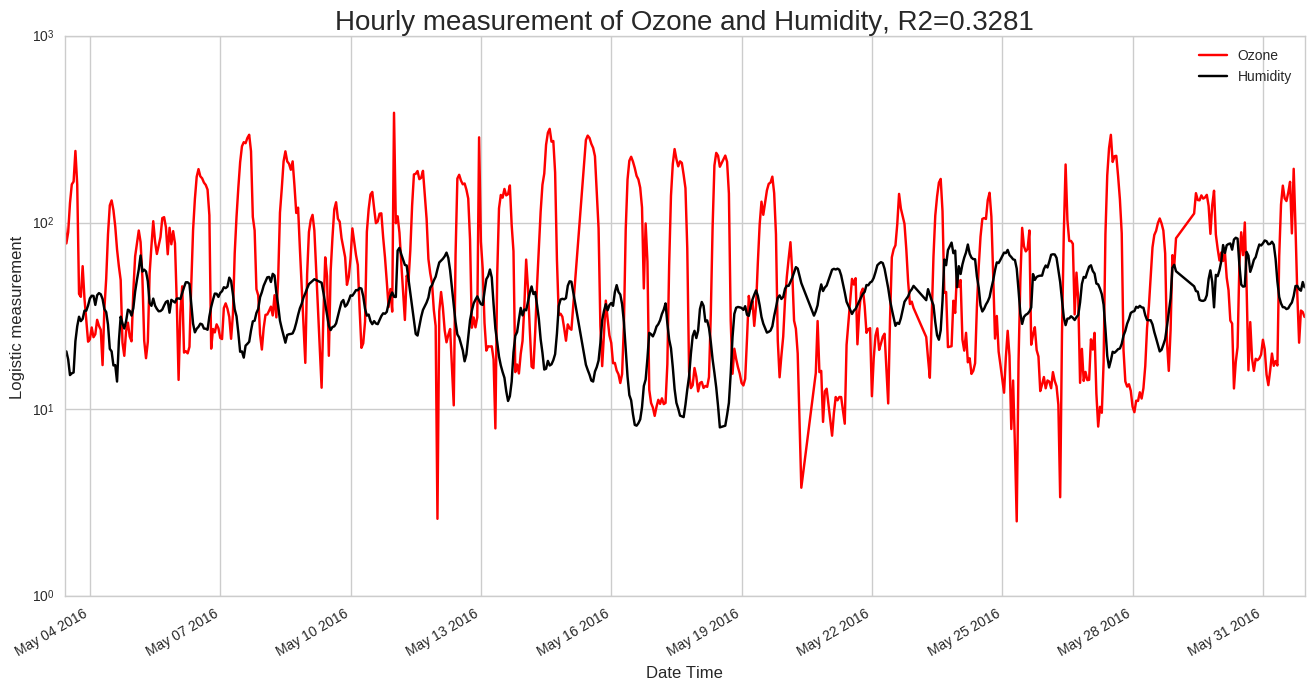

In [32]:
#Ozone vs Relative Humidity 

Regress = smf.ols(formula = 'Ozone ~ Humidity', data = df_pollution_sum).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='Humidity', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Humidity, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is correlated to hourly relative humidity measurement but has a very low R2 of 0.3281

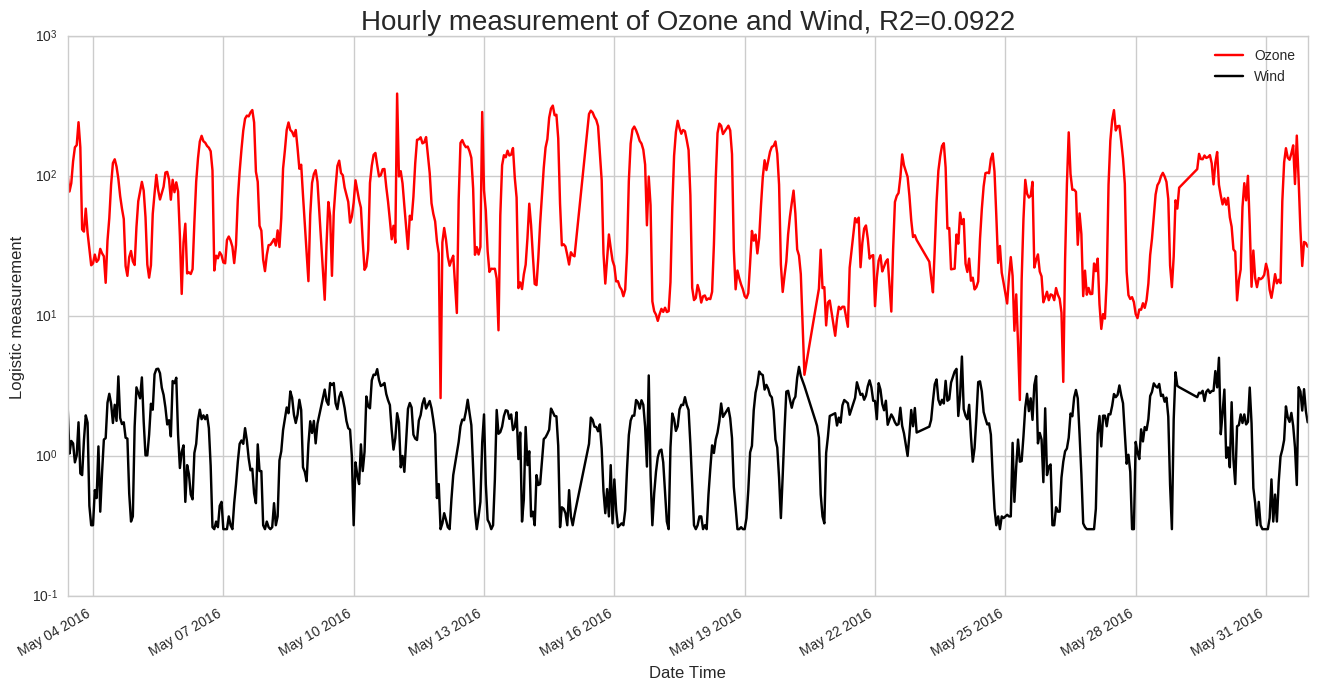

In [33]:
#Ozone vs Wind 

Regress = smf.ols(formula = 'Ozone ~ Wind', data = df_pollution_sum).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='Wind', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and Wind, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation is not correlated to hourly wind speed measurement and has poor R2 of 0.0922

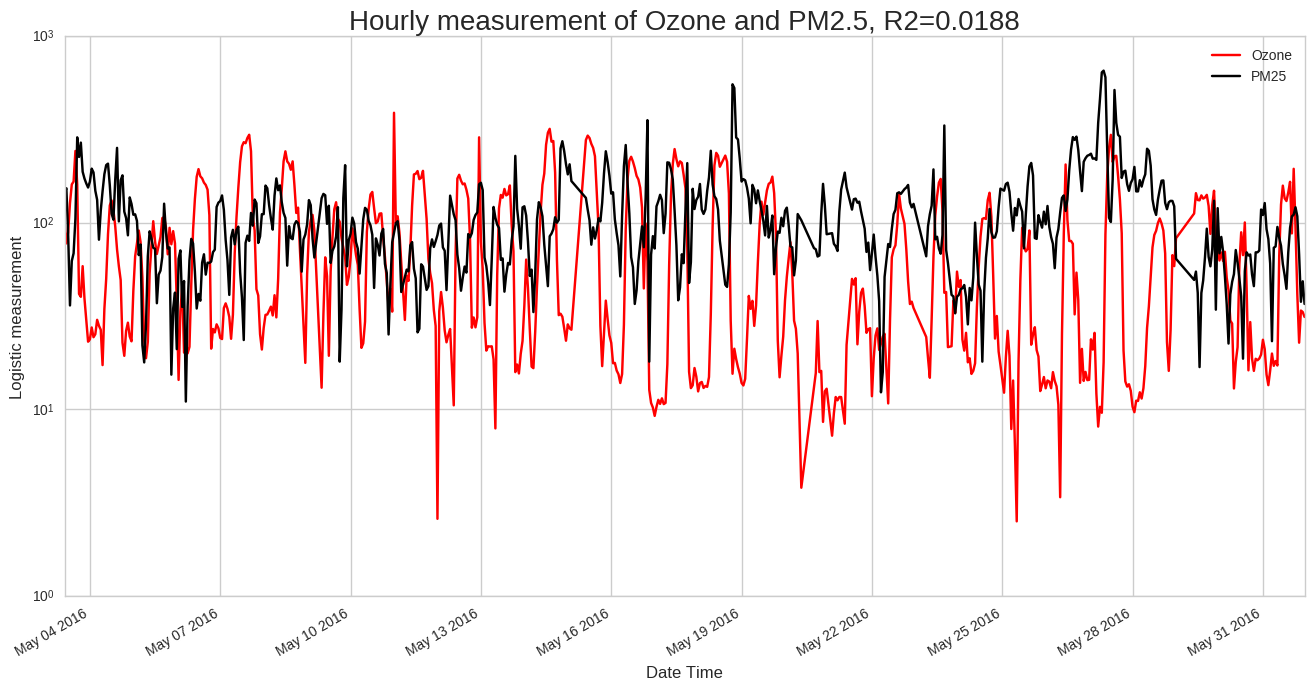

In [34]:
#Ozone vs PM2.5 

Regress = smf.ols(formula = 'Ozone ~ PM25', data = df_pollution_sum).fit()

#Visualization
sns.set_style("whitegrid")

ax = pl.figure(figsize=(16,8)).add_subplot(111)
df_pollution_sum.plot(x='dt', y='Ozone', color='red',alpha=1, ax=ax, logy=True)
df_pollution_sum.plot(x='dt', y='PM25', color='black',alpha=1, ax=ax, logy=True)
pl.title('Hourly measurement of Ozone and PM2.5, R2={0}'.format(round(Regress.rsquared, 4)), fontsize=20)
pl.ylabel("Logistic measurement", fontsize=12)
pl.xlabel("Date Time", fontsize=12)
pl.legend()
pl.show()

#### Caption: Ozone concentation has no correlated to hourly PM2.5 measurement with R2 of 0.0188

# Result of seasonal analysis: PM2.5 has no impact on Ozone formation in any season, while other variables have varying level of impact in summer and fall. None of the variables had any correlation with Ozone concentration in monsoon, which may be because of the impact of rain.  

# Regression analysis of complete data

# alpha = 0.05

In [35]:
# Regression Model with all variables except PM2.5 which showed no correlation in seasonal analysis

Regress_all = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation + Wind', 
                      data = df_pollution).fit()
Regress_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 15 Dec 2016   Prob (F-statistic):               0.00
Time:                        20:38:22   Log-Likelihood:                -61112.
No. Observations:               11619   AIC:                         1.222e+05
Df Residuals:                   11613   BIC:                         1.223e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         150.3160      3.122     48.141      0.000       144.195   156.436
NOx                -0.0107      0.002     -4.368      0.000        -0.016    -0.006
Temperature        -1.0311      0.074    -14.010      0.000        -1.175    -0.887
Humidity           -1.5503      0.028    -54.506      0.000        -1.606    -1.495
Solar_Radiation     0.1288      0.004     31.382      0.000         0.121     0.137
Wind               -0.7729      0.647     -1.195      0.232        -2.041     0.495
==============================================================================
Omnibus:                     3790.079   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20808.856
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       8.865   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Regression Model after dropping wind as it has p-values higher than alpha
Regress_2 = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation', data = df_pollution).fit()
Regress_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2129.
Date:                Thu, 15 Dec 2016   Prob (F-statistic):               0.00
Time:                        20:38:23   Log-Likelihood:                -61113.
No. Observations:               11619   AIC:                         1.222e+05
Df Residuals:                   11614   BIC:                         1.223e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         149.3711      3.021     49.450      0.000       143.450   155.292
NOx                -0.0097      0.002     -4.211      0.000        -0.014    -0.005
Temperature        -1.0347      0.074    -14.069      0.000        -1.179    -0.891
Humidity           -1.5478      0.028    -54.565      0.000        -1.603    -1.492
Solar_Radiation     0.1270      0.004     33.284      0.000         0.119     0.134
==============================================================================
Omnibus:                     3807.973   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21002.385
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       8.893   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Previous Regression Model without the intercept
Regress_2_wo = smf.ols(formula = 'Ozone ~ NOx + Temperature + Humidity + Solar_Radiation -1', data = df_pollution).fit()
Regress_2_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4270.
Date:                Thu, 15 Dec 2016   Prob (F-statistic):               0.00
Time:                        20:38:23   Log-Likelihood:                -62223.
No. Observations:               11619   AIC:                         1.245e+05
Df Residuals:                   11615   BIC:                         1.245e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
NOx                 0.0238      0.002      9.805      0.000         0.019     0.029
Temperature         1.9761      0.045     43.545      0.000         1.887     2.065
Humidity           -0.4119      0.018    -22.495      0.000        -0.448    -0.376
Solar_Radiation     0.1558      0.004     37.574      0.000         0.148     0.164
==============================================================================
Omnibus:                     3073.307   Durbin-Watson:                   0.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11007.824
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       6.996   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

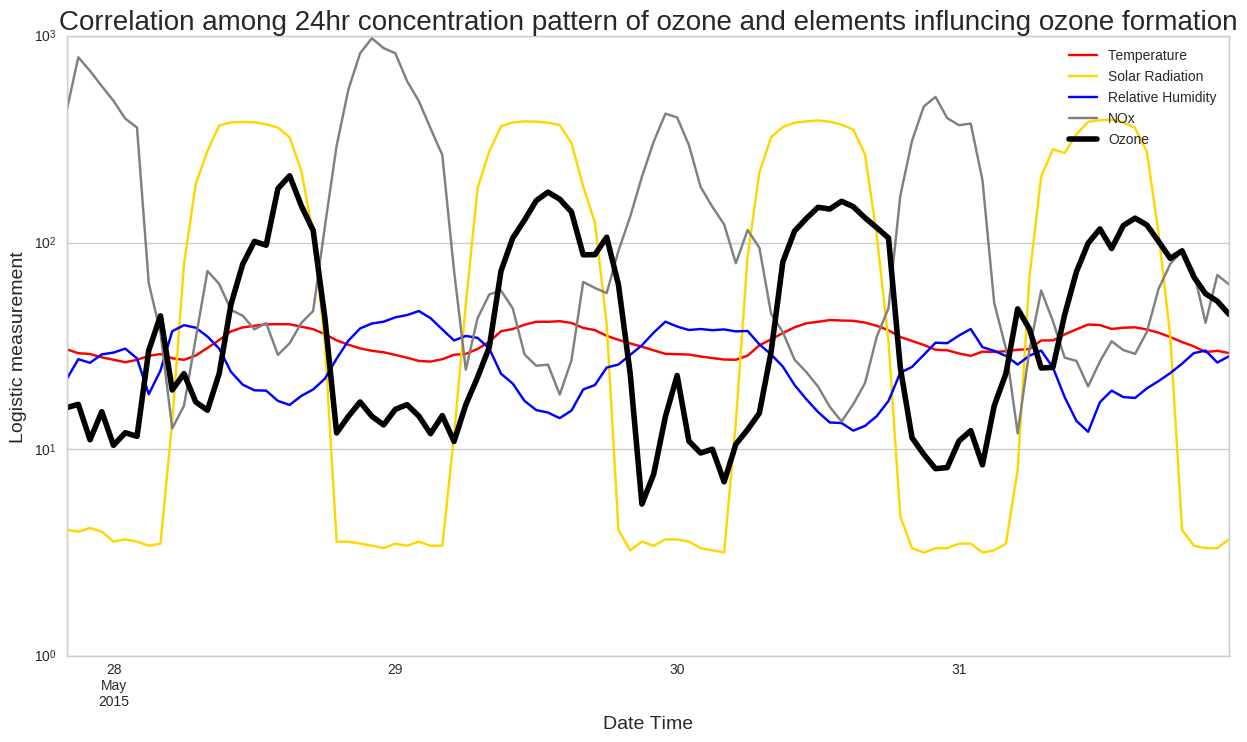

In [38]:
#Visualization of model
sns.set_style("whitegrid")

ax = pl.figure(figsize=(15,8)).add_subplot(111)
df_pollution[1000:1100].plot(y='Temperature', x='dt', color='red',alpha=1, ax=ax, logy=True, label= "Temperature")
df_pollution[1000:1100].plot(y='Solar_Radiation', x='dt', color='gold',alpha=1, ax=ax, logy=True, label= "Solar Radiation")
df_pollution[1000:1100].plot(y='Humidity', x='dt', color='blue',alpha=1, ax=ax, logy=True, label= "Relative Humidity")
df_pollution[1000:1100].plot(y='NOx', x='dt', color='gray',alpha=1, ax=ax, logy=True, label= "NOx")
df_pollution[1000:1100].plot(y='Ozone', x='dt', color='black',alpha=1, ax=ax, lw=4, logy=True, label= "Ozone")

pl.title('Correlation among 24hr concentration pattern of ozone and elements influncing ozone formation', fontsize=20)
pl.ylabel("Logistic measurement", fontsize=14)
pl.xlabel("Date Time", fontsize=14)
pl.legend()
pl.show()

# Ozone formation is can be modelled with decent accuracy takening into considration measument of solar radiation, ambient temperature, relative humidity and NOx at a given hour. This model has an adj. r-square of 0.595

# Model can be inproved if additional regresser namely VOC and rain measurements can be added. This data was not available for this study.

## Additionally the Model's R2 and adj_R2 improves after dropping the intercept, which is counter intutive to how linear regression models work. Further analysis is required to resolve this.